In [1]:
import pickle

In [2]:
import numpy as np

In [3]:
with open('train_qa.txt','rb') as f:
    train_data=pickle.load(f)

In [4]:
with open('test_qa.txt','rb') as f:
    test_data=pickle.load(f)

In [5]:
type(test_data)

list

In [6]:
len(train_data)

10000

In [7]:
len(test_data)

1000

In [8]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [9]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [11]:
train_data[0][2]

'no'

In [12]:
all_data=test_data+train_data

In [13]:
len(all_data)

11000

In [14]:
vocab=set()

for story,question,answer in all_data:
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(question))

In [15]:
vocab.add('no')

In [16]:
vocab.add('yes')

In [17]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [18]:
vocab_len=len(vocab)+1

In [19]:
vocab_len

38

In [20]:

#LONGEST-STORY

all_story_lens=[len(data[0]) for data in all_data]


In [21]:
all_story_lens

[12,
 23,
 35,
 47,
 59,
 13,
 26,
 37,
 50,
 62,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 47,
 59,
 12,
 25,
 36,
 48,
 59,
 12,
 26,
 39,
 51,
 63,
 13,
 24,
 37,
 50,
 62,
 13,
 26,
 38,
 50,
 63,
 13,
 25,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 64,
 13,
 25,
 37,
 50,
 62,
 13,
 25,
 37,
 50,
 61,
 12,
 25,
 38,
 50,
 62,
 12,
 25,
 37,
 50,
 61,
 12,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 37,
 49,
 60,
 13,
 25,
 39,
 51,
 64,
 12,
 25,
 37,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 62,
 13,
 25,
 37,
 50,
 62,
 12,
 23,
 35,
 47,
 59,
 12,
 25,
 37,
 48,
 73,
 12,
 24,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 62,
 14,
 26,
 37,
 49,
 62,
 12,
 23,
 35,
 48,
 59,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 37,
 49,
 61,
 12,
 25,
 37,
 50,
 62,
 12,
 24,
 36,
 47,
 58,
 12,
 24,
 36,
 48,
 61,
 25,
 38,
 50,
 62,
 74,
 13,
 25,
 37,
 49,
 62,
 12,
 24,
 37,
 49,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 61,
 12,
 25,
 36,
 50,
 62,


In [22]:
max_story_len=max(all_story_lens)

In [23]:
max_question_len=max([len(data[1]) for data in all_data])

In [24]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [25]:
tokenizer=Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [26]:
tokenizer.word_index

{'is': 1,
 'hallway': 2,
 'garden': 3,
 'football': 4,
 'office': 5,
 'yes': 6,
 '?': 7,
 'to': 8,
 'discarded': 9,
 'sandra': 10,
 'down': 11,
 'put': 12,
 'milk': 13,
 'left': 14,
 'in': 15,
 'travelled': 16,
 'bathroom': 17,
 'kitchen': 18,
 'up': 19,
 'mary': 20,
 'grabbed': 21,
 'got': 22,
 'no': 23,
 'the': 24,
 'bedroom': 25,
 'back': 26,
 '.': 27,
 'moved': 28,
 'apple': 29,
 'john': 30,
 'picked': 31,
 'daniel': 32,
 'took': 33,
 'went': 34,
 'there': 35,
 'journeyed': 36,
 'dropped': 37}

In [27]:
train_story_text=[]
train_question_text=[]
train_answers=[]

In [28]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [29]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [30]:
train_story_seq=tokenizer.texts_to_sequences(train_story_text)

In [31]:
len(train_story_seq)

10000

In [32]:
train_story_seq

[[20, 28, 8, 24, 17, 27, 10, 36, 8, 24, 25, 27],
 [20,
  28,
  8,
  24,
  17,
  27,
  10,
  36,
  8,
  24,
  25,
  27,
  20,
  34,
  26,
  8,
  24,
  25,
  27,
  32,
  34,
  26,
  8,
  24,
  2,
  27],
 [20,
  28,
  8,
  24,
  17,
  27,
  10,
  36,
  8,
  24,
  25,
  27,
  20,
  34,
  26,
  8,
  24,
  25,
  27,
  32,
  34,
  26,
  8,
  24,
  2,
  27,
  10,
  34,
  8,
  24,
  18,
  27,
  32,
  34,
  26,
  8,
  24,
  17,
  27],
 [20,
  28,
  8,
  24,
  17,
  27,
  10,
  36,
  8,
  24,
  25,
  27,
  20,
  34,
  26,
  8,
  24,
  25,
  27,
  32,
  34,
  26,
  8,
  24,
  2,
  27,
  10,
  34,
  8,
  24,
  18,
  27,
  32,
  34,
  26,
  8,
  24,
  17,
  27,
  32,
  31,
  19,
  24,
  4,
  35,
  27,
  32,
  34,
  8,
  24,
  25,
  27],
 [20,
  28,
  8,
  24,
  17,
  27,
  10,
  36,
  8,
  24,
  25,
  27,
  20,
  34,
  26,
  8,
  24,
  25,
  27,
  32,
  34,
  26,
  8,
  24,
  2,
  27,
  10,
  34,
  8,
  24,
  18,
  27,
  32,
  34,
  26,
  8,
  24,
  17,
  27,
  32,
  31,
  19,
  24,
  4,
  35,
  27,

In [33]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [34]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [35]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [36]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [37]:
inputs_test

array([[ 0,  0,  0, ..., 24, 25, 27],
       [ 0,  0,  0, ..., 24,  3, 27],
       [ 0,  0,  0, ..., 24,  3, 27],
       ...,
       [ 0,  0,  0, ..., 24, 29, 27],
       [ 0,  0,  0, ..., 24,  3, 27],
       [ 0,  0,  0, ..., 29, 35, 27]])

In [38]:
queries_test

array([[ 1, 30, 15, 24, 18,  7],
       [ 1, 30, 15, 24, 18,  7],
       [ 1, 30, 15, 24,  3,  7],
       ...,
       [ 1, 20, 15, 24, 25,  7],
       [ 1, 10, 15, 24,  3,  7],
       [ 1, 20, 15, 24,  3,  7]])

In [39]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [41]:
tokenizer.word_index['yes']

6

In [42]:
tokenizer.word_index['no']

23

In [43]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [44]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [45]:
vocab_size=vocab_len=len(vocab)+1

In [46]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))


Instructions for updating:
Colocations handled automatically by placer.


In [47]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [48]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [49]:

#ENCODED <----- ENCODER(INPUT)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [50]:
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [51]:
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  

In [52]:
#concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [53]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 6, 220) dtype=float32>

In [54]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [55]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [56]:
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
____________________________________________________________________________________________

In [58]:
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 10000 samples, validate on 1000 samples
Epoch 1/120
10000/10000 [==============================] - 11s 1ms/step - loss: 0.9172 - accuracy: 0.4867 - val_loss: 0.7006 - val_accuracy: 0.4970
Epoch 2/120
10000/10000 [==============================] - 10s 973us/step - loss: 0.7054 - accuracy: 0.4924 - val_loss: 0.6956 - val_accuracy: 0.5030
Epoch 3/120
10000/10000 [==============================] - 10s 964us/step - loss: 0.6957 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 4/120
10000/10000 [==============================] - 10s 1ms/step - loss: 0.6951 - accuracy: 0.4941 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/120
10000/10000 [==============================] - 11s 1ms/step - loss: 0.6952 - accuracy: 0.4893 - val_loss: 0.6937 - val_accuracy: 0.4970
Epoch 6/120
10000/10000 [==============================] - 13s 1ms/step - loss: 0

10000/10000 [==============================] - 74s 7ms/step - loss: 0.3682 - accuracy: 0.8341 - val_loss: 0.4700 - val_accuracy: 0.7800 - loss: 0. - ETA: 27s - loss - ETA: 20s - loss: 0.3634 - acc - ETA: 17s - loss: 0.3642 - ac - ETA: 14s - loss: 0.3647 - accuracy:  - ETA: 12s - loss: 0.3647 -  - ETA: 
Epoch 55/120
10000/10000 [==============================] - 115s 12ms/step - loss: 0.3580 - accuracy: 0.8385 - val_loss: 0.4628 - val_accuracy: 0.7740
Epoch 56/120
10000/10000 [==============================] - 114s 11ms/step - loss: 0.3676 - accuracy: 0.8361 - val_loss: 0.4498 - val_accuracy: 0.7790
Epoch 57/120
10000/10000 [==============================] - 126s 13ms/step - loss: 0.3594 - accuracy: 0.8389 - val_loss: 0.4568 - val_accuracy: 0.7770
Epoch 58/120
10000/10000 [==============================] - 143s 14ms/step - loss: 0.3575 - accuracy: 0.8400 - val_loss: 0.4727 - val_accuracy: 0.7870
Epoch 59/120
10000/10000 [==============================] - 142s 14ms/step - loss: 0.3541 - 

10000/10000 [==============================] - 42s 4ms/step - loss: 0.2525 - accuracy: 0.8923 - val_loss: 0.5084 - val_accuracy: 0.8100
Epoch 106/120
10000/10000 [==============================] - 34s 3ms/step - loss: 0.2511 - accuracy: 0.8962 - val_loss: 0.4970 - val_accuracy: 0.8100
Epoch 107/120
10000/10000 [==============================] - 29s 3ms/step - loss: 0.2499 - accuracy: 0.8938 - val_loss: 0.4926 - val_accuracy: 0.8030
Epoch 108/120
10000/10000 [==============================] - 29s 3ms/step - loss: 0.2509 - accuracy: 0.8972 - val_loss: 0.5358 - val_accuracy: 0.8120
Epoch 109/120
10000/10000 [==============================] - 28s 3ms/step - loss: 0.2458 - accuracy: 0.8978 - val_loss: 0.5238 - val_accuracy: 0.8150
Epoch 110/120
10000/10000 [==============================] - 31s 3ms/step - loss: 0.2464 - accuracy: 0.8981 - val_loss: 0.5211 - val_accuracy: 0.8130
Epoch 111/120
10000/10000 [==============================] - 29s 3ms/step - loss: 0.2430 - accuracy: 0.8977 - val_

In [59]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


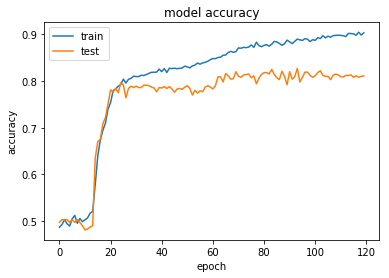

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

In [63]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [64]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [65]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [66]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [67]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9999248


In [68]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [69]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [70]:
my_question = "Is the football in the garden ?"

In [71]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [72]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [73]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [74]:
pred_results = model.predict(([ my_story, my_ques]))

In [75]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.9659091
